In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('winequality-red.csv')

In [3]:
# let's see the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# let's get the number of rows and columns
df.shape

(1599, 12)

In [5]:
# let's look at the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#let's see if any column has any null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# let's check if any of the rows are duplicated, they must be removed immediately
duplicates=df.duplicated()

In [8]:
df[duplicates]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
# Removing duplicate rows
df=df.drop_duplicates()

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# Let's look at the descriptive statistics 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### There are high chances of presence of outliers in residual sugar, chlorides, free sulphur dioxide,total sulphur dioxide

In [12]:
# let's check the unique values in quality
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# EDA

In [13]:
grey_palette = sns.color_palette(['#AAAAB6','#B79EBC','#9C7DA1','#A46D87','#DEB8AD','#EDD8BB'])
sns.set_palette(grey_palette)

<AxesSubplot:>

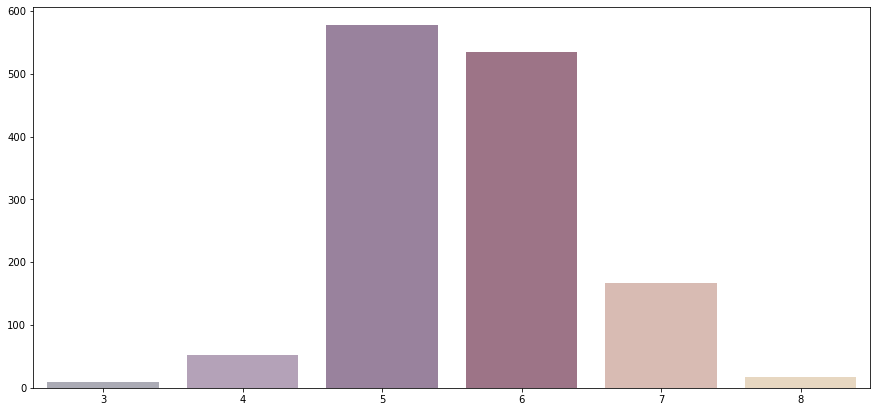

In [14]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['quality'].value_counts().index,y=df['quality'].value_counts().values)

Correlation between fixed acidity and quality is 0.11902366561349755
Skewness of the fixed column is 0.9410413664561449


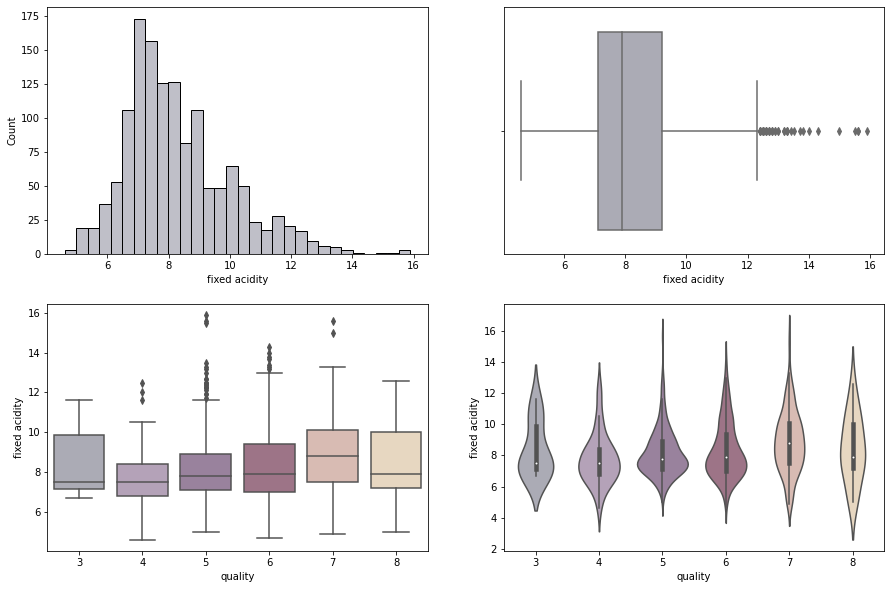

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['fixed acidity'])
plt.subplot(2,2,2)
sns.boxplot(df['fixed acidity'])                                 
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['fixed acidity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['fixed acidity'])
print('Correlation between fixed acidity and quality is',df['quality'].corr(df['fixed acidity']))
print('Skewness of the fixed column is',df['fixed acidity'].skew())

1. As we can see that there are some outliers in the 'fixed acidity' column due to which the distibution is positively skewed
2. There is not much correlation between the column quality and fixed acidity column 
3. All the available quality of the wine are having fixed acidity in fixed range i.e.7- 10

Correlation between volatile acidity and quality is -0.39521368900984
Skewness of the volatile acidity column is 0.7292789463991854


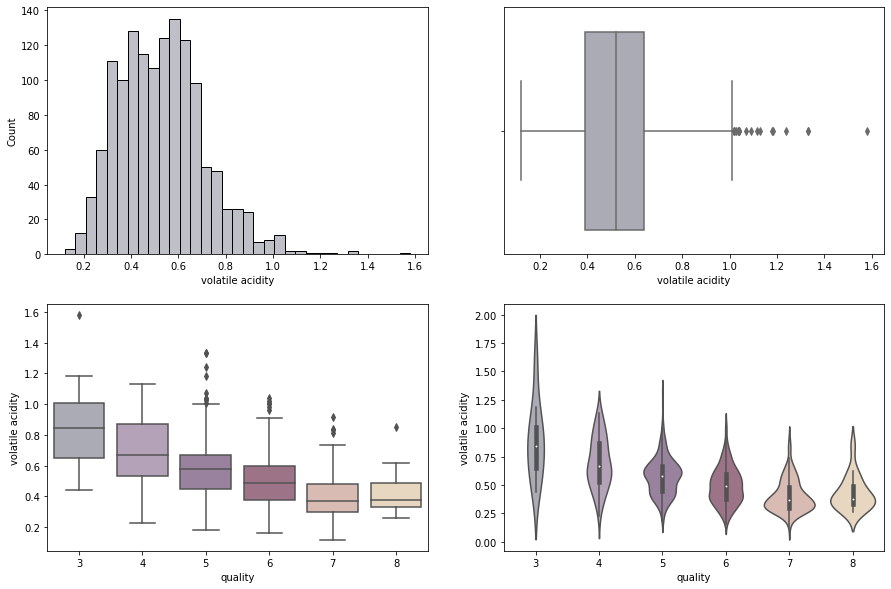

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(df['volatile acidity'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['volatile acidity'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['volatile acidity'])
print('Correlation between volatile acidity and quality is',df['quality'].corr(df['volatile acidity']))
print('Skewness of the volatile acidity column is',df['volatile acidity'].skew())

1. There are some outliers which makes this 'volatile acidity' right skewed.

   ->volatile acidity range for 3rd quality is 0.65-1
   ->volatile acidity range for 4th quality is 0.50-0.85
   ->volatile acidity range for 5th quality is 0.45-0.65
   ->volatile acidity range for 6th quality is 0.45-0.60
   ->volatile acidity range for 7th quality is 0.25-0.50
   ->volatile acidity range for 8th quality is 0.30-0.50
3. 7th and 8th quality mostly overlap
4. there is negative correlation between 'volatile acidity' and 'quatity' column.
5. Lesser the value of volatile acidity more are the chances of the wine to be of good quality.

Correlation between citric acid and quality is 0.22805745919929954
Skewness of the citric acid column is 0.31272554238899036


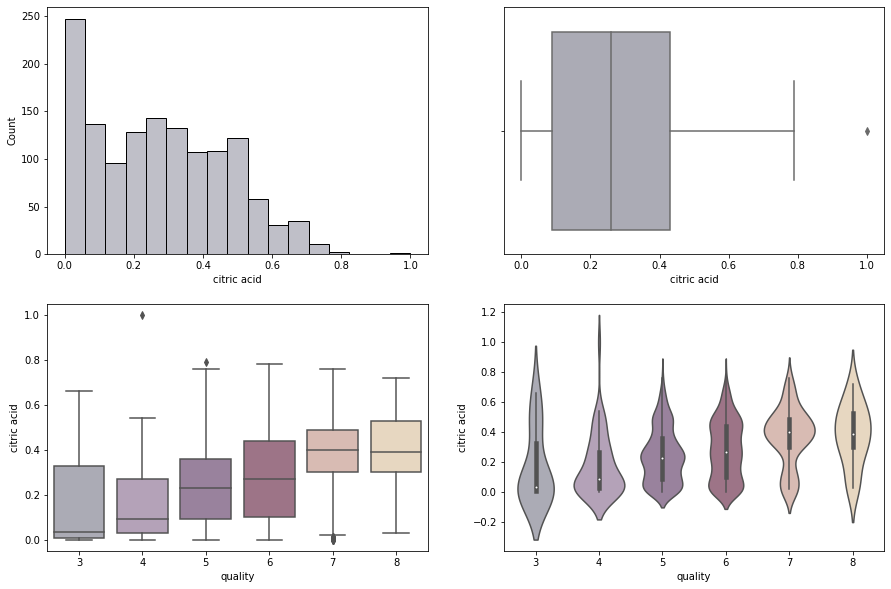

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['citric acid'])
plt.subplot(2,2,2)
sns.boxplot(df['citric acid'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['citric acid'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['citric acid'])
print('Correlation between citric acid and quality is',df['quality'].corr(df['citric acid']))
print('Skewness of the citric acid column is',df['citric acid'].skew())

1. The data follows normal distribution.
2. There is positive correlation between 'citric acid' and qualtiy column.
3. The higher the content of citric acid more are the chances of wine quality be good.
4. Data of the this column is not skewed

Correlation between residual sugar and quality is 0.013640470048445852
Skewness of the residual sugar column is 4.548153403940447


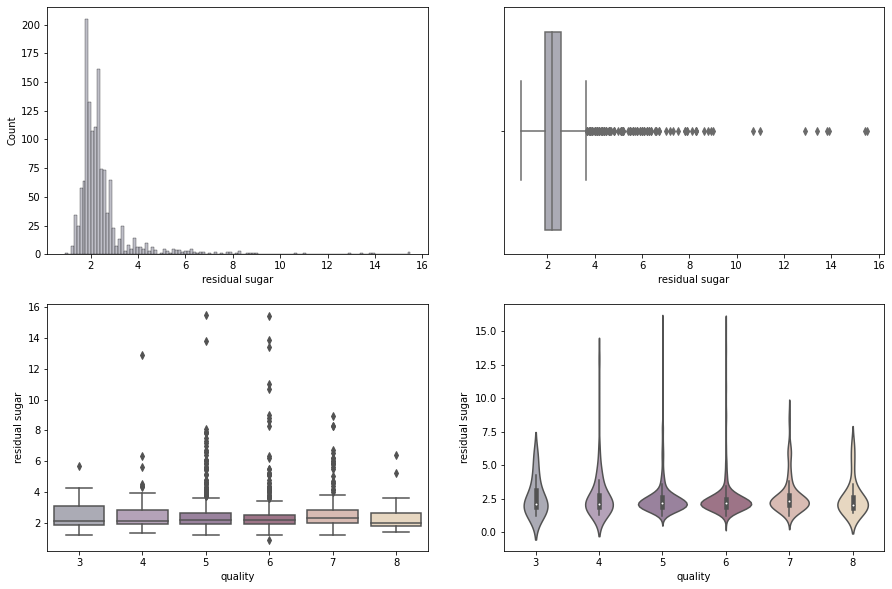

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['residual sugar'])
plt.subplot(2,2,2)
sns.boxplot(df['residual sugar'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['residual sugar'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['residual sugar'])
print('Correlation between residual sugar and quality is',df['quality'].corr(df['residual sugar']))
print('Skewness of the residual sugar column is',df['residual sugar'].skew())

1. The data in this column is highly skewed.
2. There is no correlation between 'residual sugar' and quality column.
3. Most of the wine is having sugar level less than 3.

Correlation between chlorides and quality is -0.13098841286642643
Skewness of the chlorides column is 5.502487294623722


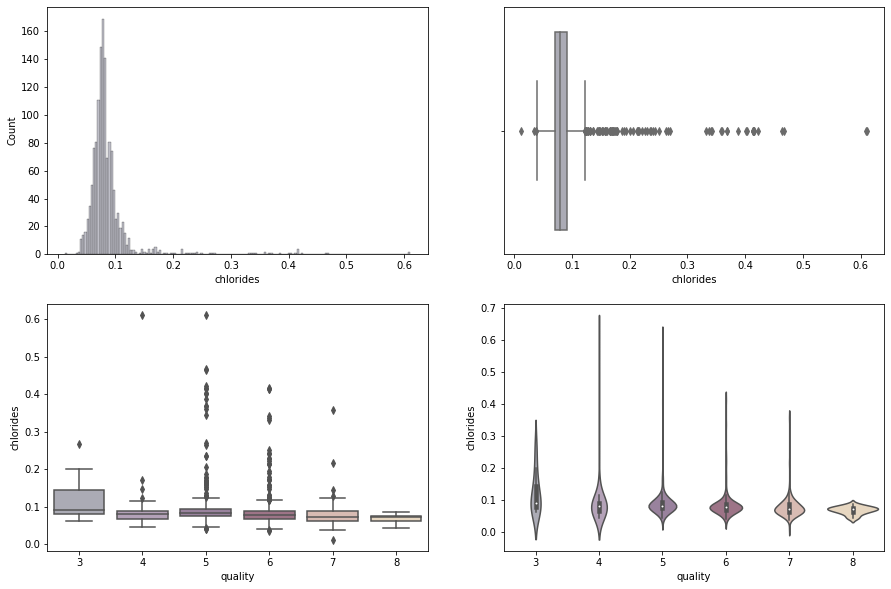

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['chlorides'])
plt.subplot(2,2,2)
sns.boxplot(df['chlorides'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['chlorides'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['chlorides'])
print('Correlation between chlorides and quality is',df['quality'].corr(df['chlorides']))
print('Skewness of the chlorides column is',df['chlorides'].skew())

1. The data is highly skewed because of the presence of the outliers.
2. The chloride level of most of the wine is less than 0.1.
3. There is not much correlation between chlorides and quality of the wine.


Correlation between free sulfur dioxide and quality is -0.050462766805025684
Skewness of the free sulfur dioxide column is 1.2265794991760643


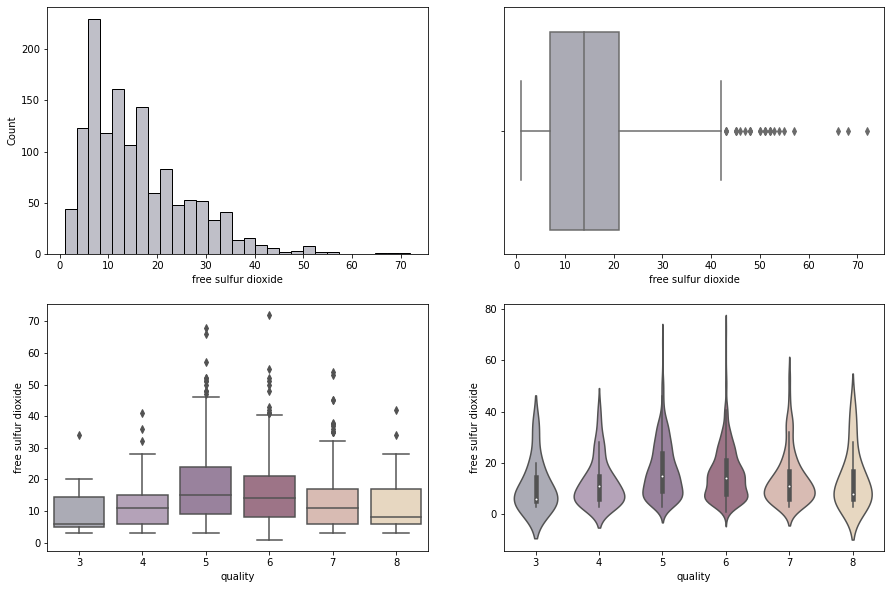

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['free sulfur dioxide'])
plt.subplot(2,2,2)
sns.boxplot(df['free sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['free sulfur dioxide'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['free sulfur dioxide'])
print('Correlation between free sulfur dioxide and quality is',df['quality'].corr(df['free sulfur dioxide']))
print('Skewness of the free sulfur dioxide column is',df['free sulfur dioxide'].skew())

1. The data is positively skewed.
2. There is not any correlation between free sulfur dioxide and quality column.

Correlation between total sulfur dioxide and quality is -0.1778553656802958
Skewness of the total sulfur dioxide column is 1.5403680777213933


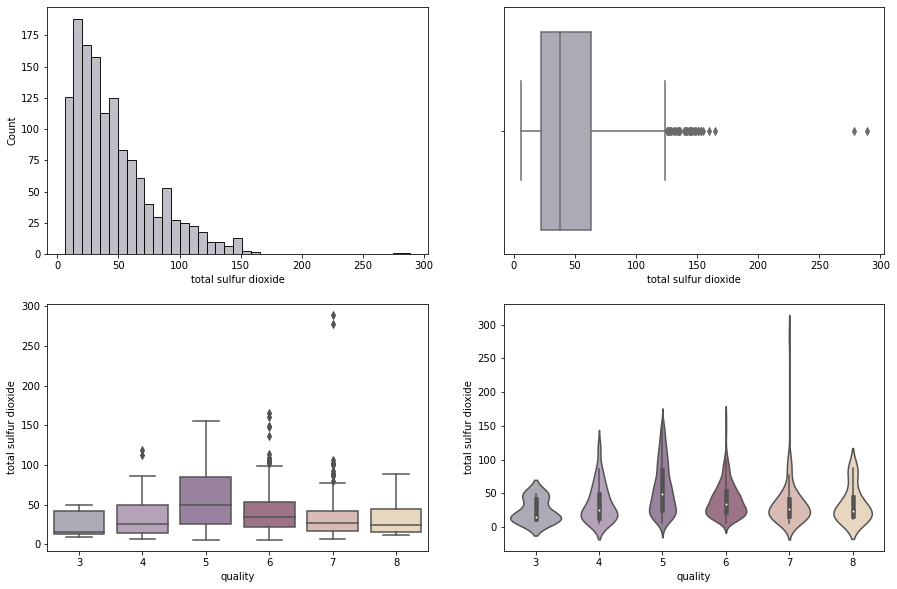

In [21]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['total sulfur dioxide'])
plt.subplot(2,2,2)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['total sulfur dioxide'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['total sulfur dioxide'])
print('Correlation between total sulfur dioxide and quality is',df['quality'].corr(df['total sulfur dioxide']))
print('Skewness of the total sulfur dioxide column is',df['total sulfur dioxide'].skew())

1. The data is positively skewed.
2. There is not any correlation between total sulfur dioxide and quality column.

Correlation between density and quality is -0.1842516501190237
Skewness of the density column is 0.04477785573116107


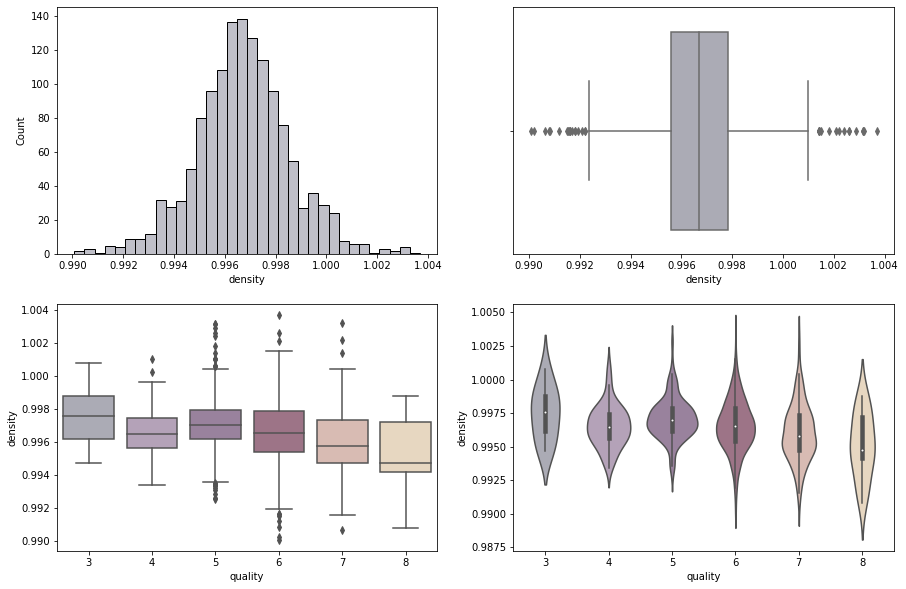

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['density'])
plt.subplot(2,2,2)
sns.boxplot(df['density'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['density'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['density'])
print('Correlation between density and quality is',df['quality'].corr(df['density']))
print('Skewness of the density column is',df['density'].skew())

1. The data is normally distributed.
2. The lower the density better the quality of the wine.

Correlation between pH and quality is -0.055245114958671765
Skewness of the pH column is 0.2320322752014824


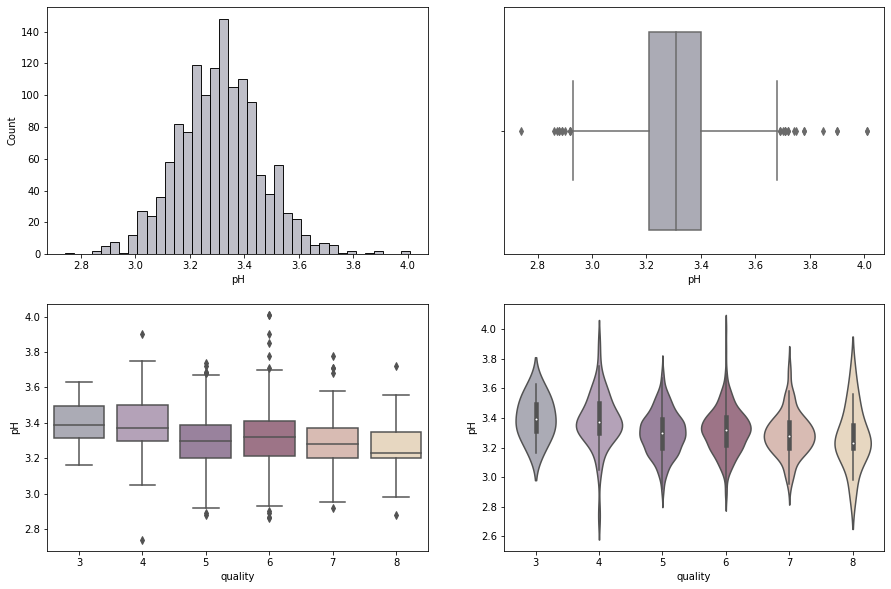

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['pH'])
plt.subplot(2,2,2)
sns.boxplot(df['pH'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['pH'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['pH'])
print('Correlation between pH and quality is',df['quality'].corr(df['pH']))
print('Skewness of the pH column is',df['pH'].skew())

1. The data is normally distributed.
2. There is no correlation between the pH and quality of the wine

Correlation between sulphates and quality is 0.24883513557788764
Skewness of the sulphates column is 2.4065046145674196


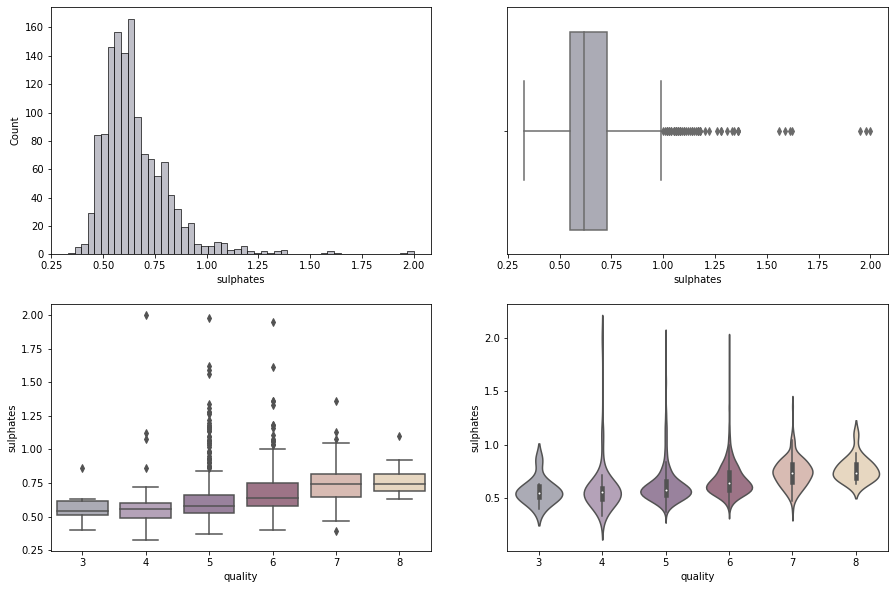

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['sulphates'])
plt.subplot(2,2,2)
sns.boxplot(df['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['sulphates'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['sulphates'])
print('Correlation between sulphates and quality is',df['quality'].corr(df['sulphates']))
print('Skewness of the sulphates column is',df['sulphates'].skew())

1. The data is positively skewed.
2. There is some correlation between the sulphates and quality columnn.
3. Higher the content of sulphates the more chances of the wine to be good.

Correlation between alcohol and quality is 0.4803428980019909
Skewness of the alcohol column is 0.8598411692032926


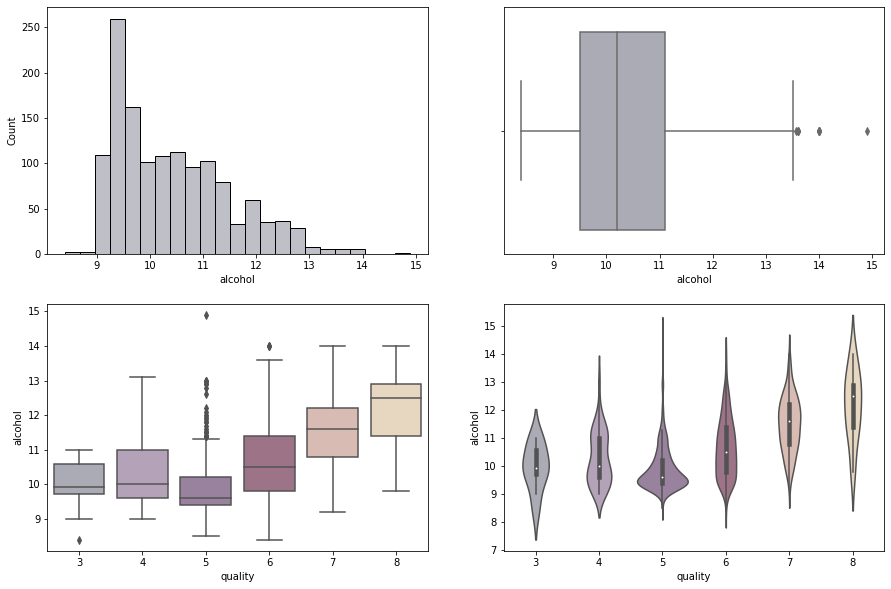

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(x=df['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(df['alcohol'])
plt.subplot(2,2,3)
sns.boxplot(x=df['quality'],y=df['alcohol'])
plt.subplot(2,2,4)
sns.violinplot(x=df['quality'],y=df['alcohol'])
print('Correlation between alcohol and quality is',df['quality'].corr(df['alcohol']))
print('Skewness of the alcohol column is',df['alcohol'].skew())

1. The data is normally distributed.
2. The correlation between the alcohol and the quality is very high.
3. More the content of the alcohol more are the chances of the wine to be good quality as expected.

<AxesSubplot:>

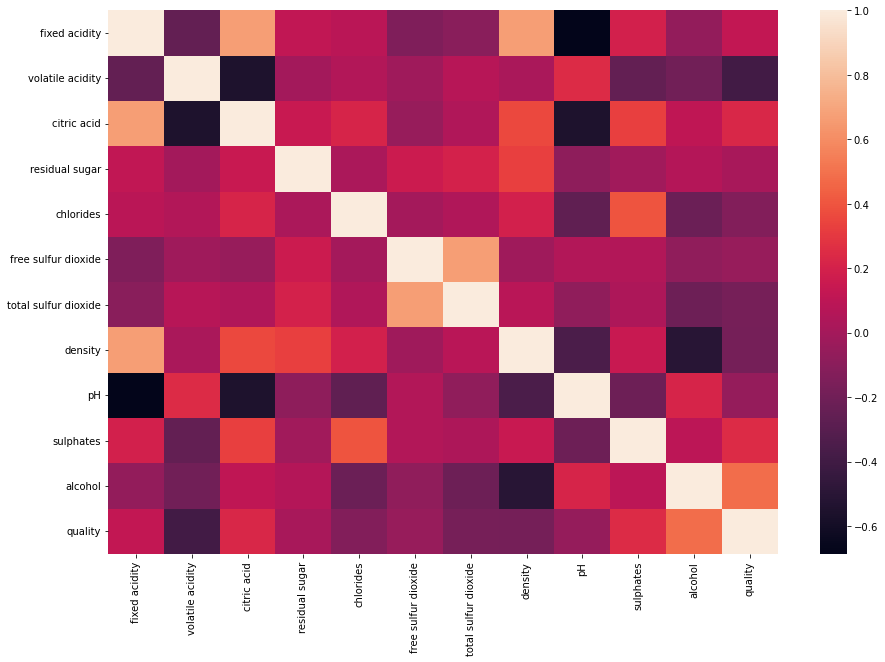

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

1. More the content of Citric acid higher is the fixed acidity.
2. Lesser the value in pH scale more the acidity, pH scale ranges from 0-14 7 is neutral and 0-7 level shows how acidic the solution is.
3. Higher the density of the wine more acidic the wine is, there is high negative correlation between the density and the acidity of the wine.
4. More the content of the alcohol, lower the density is, there is high negative correlation between the density and the alcohol of content of the wine.
5. There  is some positive correlation between the sulphate and chloride content of the wine.
6. More the citric acid the higher is the acidity and that makes the density high.
7. Total sulphur dioxide is highly correlated with free sulphur dioxide.

<AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>

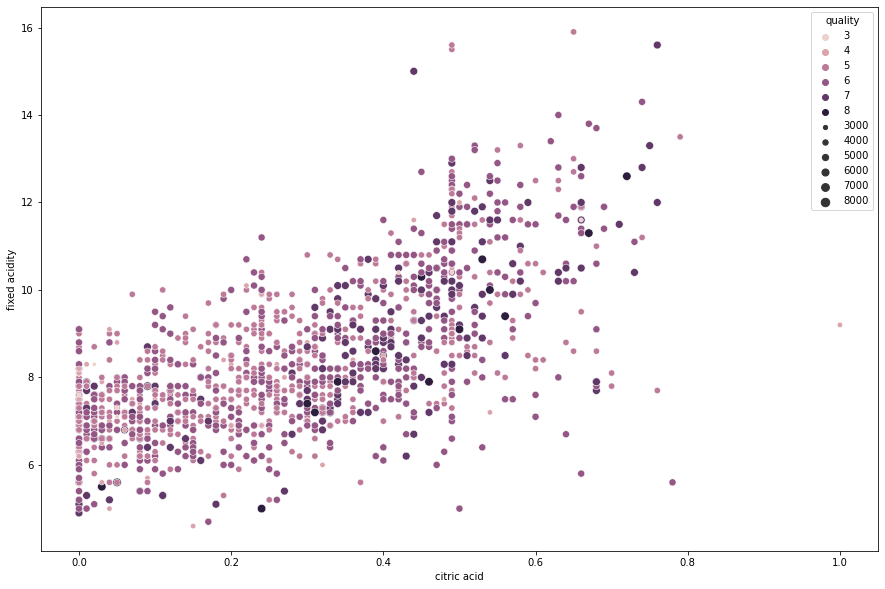

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['citric acid'],y=df['fixed acidity'],hue=df['quality'],size=(df['quality']*1000))

As we can see there is some kind of linear relatioship between citric acid and acidity.
Higher content of citric acid causes increase in acidity of the wine which is kind of usual
Most of the best wine are those who have higher content of citric acid.

<AxesSubplot:xlabel='density', ylabel='fixed acidity'>

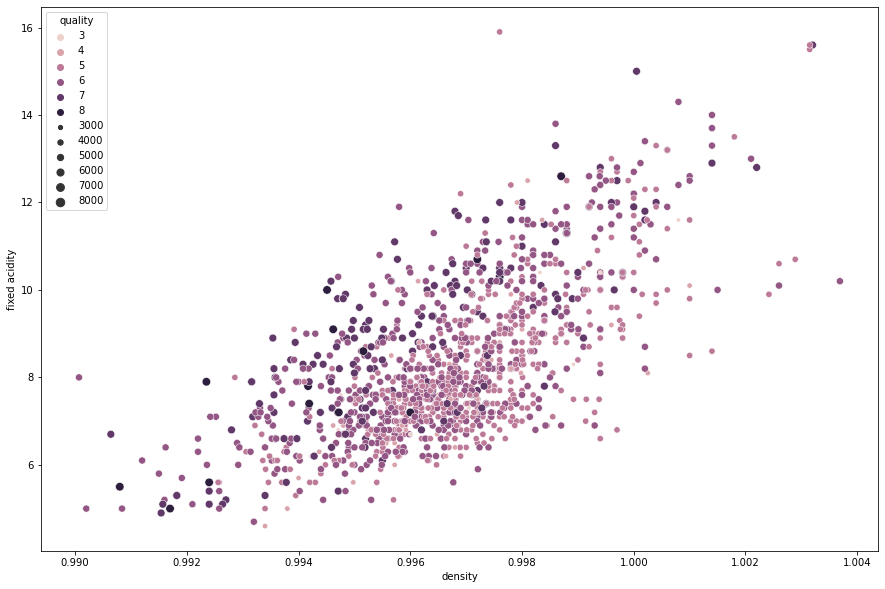

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['density'],y=df['fixed acidity'],hue=df['quality'],size=df['quality']*1000)

There is a linear sort of relation between acidity and density.
As acidity increases, density also tends to increase.

<AxesSubplot:xlabel='density', ylabel='alcohol'>

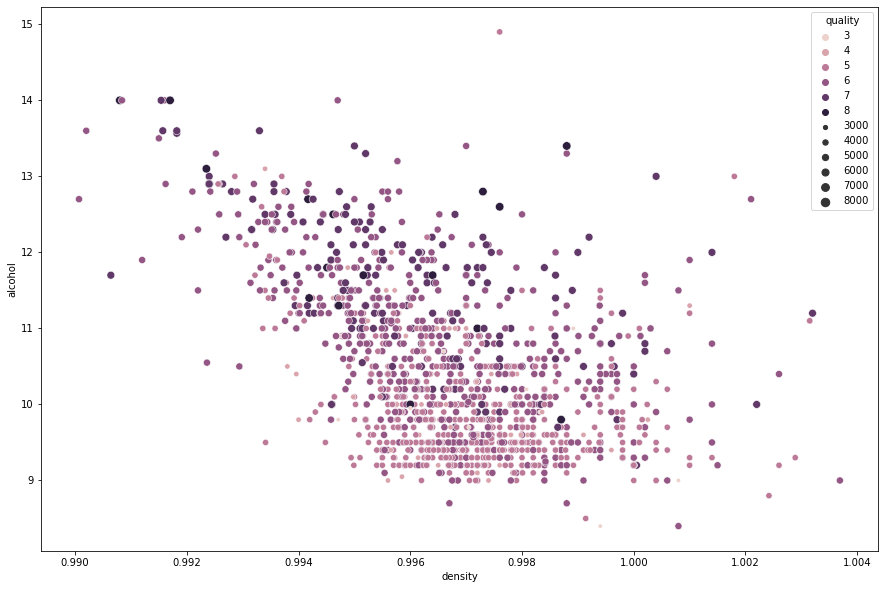

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['density'],y=df['alcohol'],hue=df['quality'],size=df['quality']*1000)

There is inverse correlation between alcohol content and density.
Higer content of alcohol causes density to decrease.
All the good wine have high content of alcohol thus it has low density.

In [32]:
df.shape

(1359, 12)

# Removing Outliers

In [33]:
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z < 3).all(axis=1)]

In [34]:
X=df.drop('quality',axis=1)
y=df['quality']

In [35]:
y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

<AxesSubplot:xlabel='quality', ylabel='count'>

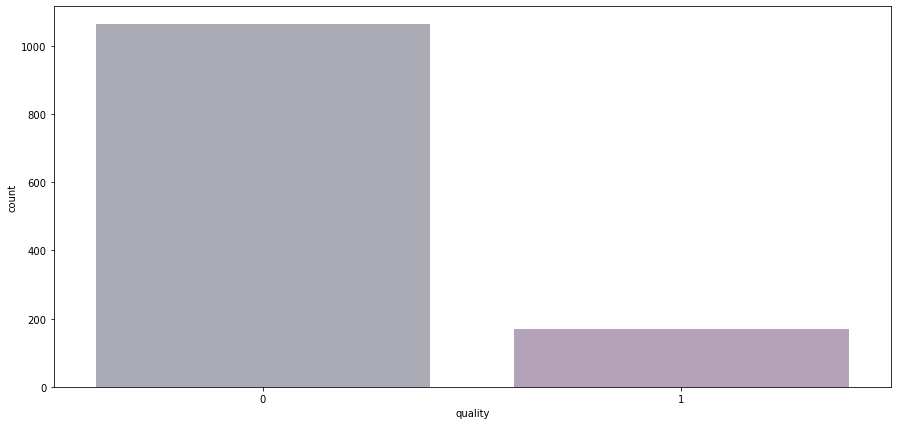

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x=y)

# Handling Imbalance Classes

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)

<AxesSubplot:xlabel='quality', ylabel='count'>

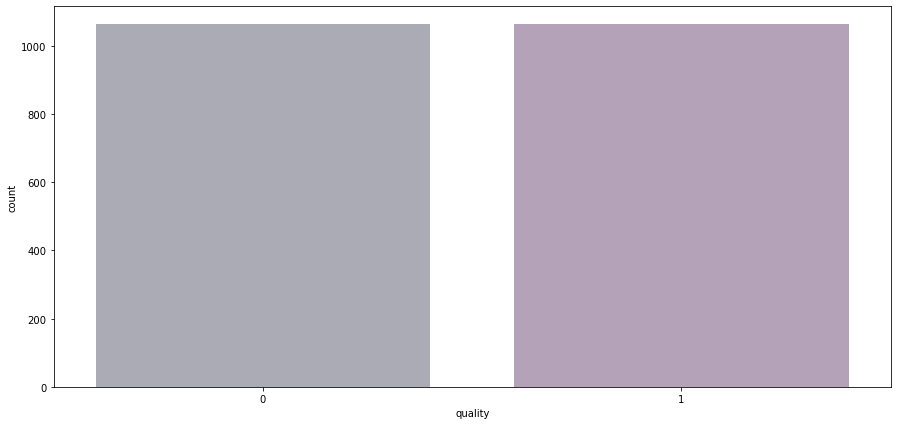

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_smote)

# Train_test_split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='newton-cg')

In [43]:
lr_model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [44]:
lr_model.score(X_test,y_test)

0.8526645768025078

In [45]:
y_lr_pred=lr_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       321
           1       0.83      0.88      0.86       317

    accuracy                           0.85       638
   macro avg       0.85      0.85      0.85       638
weighted avg       0.85      0.85      0.85       638



In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_lr_pred))

[[264  57]
 [ 37 280]]


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()

In [49]:
parameters={'criterion':['gini','entropy','log_loss'],
       'splitter':['best','random'],
       'max_depth':[2,4,6,8],
       'min_samples_split':[2,4,6,8],
       'min_samples_leaf':[1,2,3,4],
       'max_features':['auto','sqrt','log2'],     
       }
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(dtr,parameters,cv=5,scoring='f1_macro')
grid_search.fit(X_train,y_train)
print('The Parameters are:',grid_search.best_params_)

The Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [50]:
dtr=DecisionTreeClassifier(criterion = grid_search.best_params_.get('criterion'),
                                  splitter = grid_search.best_params_.get('splitter'),
                                  max_depth = grid_search.best_params_.get('max_depth'),
                                  max_features = grid_search.best_params_.get('max_features'),
                                  min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                                  min_samples_split = grid_search.best_params_.get('min_samples_split'),
                                  random_state = 42)

In [51]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=42)

In [52]:
y_pred=dtr.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       321
           1       0.80      0.91      0.85       317

    accuracy                           0.84       638
   macro avg       0.85      0.84      0.84       638
weighted avg       0.85      0.84      0.84       638



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[249  72]
 [ 28 289]]


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc=RandomForestClassifier()

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_rfc_pred=rfc.predict(X_test)

In [59]:
print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       321
           1       0.90      0.97      0.94       317

    accuracy                           0.93       638
   macro avg       0.94      0.93      0.93       638
weighted avg       0.94      0.93      0.93       638



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_rfc_pred))

[[288  33]
 [  9 308]]


# AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [62]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [63]:
y_abc_pred=abc.predict(X_test)

In [64]:
abc.score(X_train,y_train)

0.8924731182795699

In [65]:
print(classification_report(y_test,y_abc_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       321
           1       0.86      0.91      0.88       317

    accuracy                           0.88       638
   macro avg       0.88      0.88      0.88       638
weighted avg       0.88      0.88      0.88       638



In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_abc_pred))

[[272  49]
 [ 27 290]]


# Model Evaluation

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

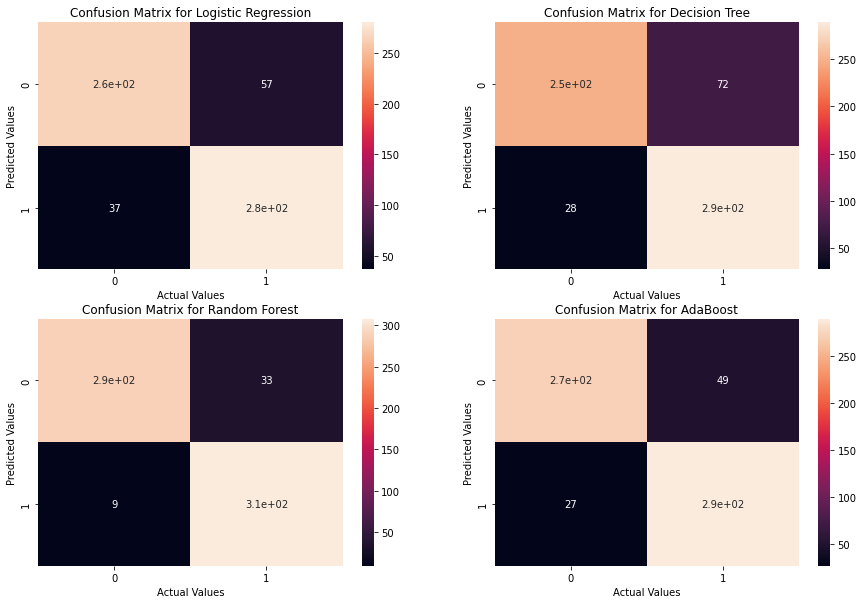

In [67]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test,y_lr_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test,y_rfc_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test,y_abc_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for AdaBoost')

(0.7, 1.0)

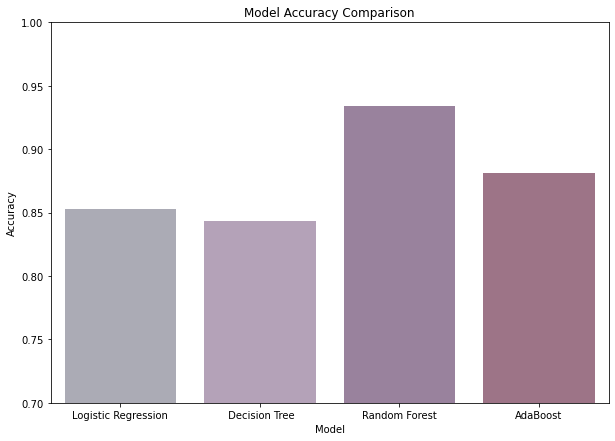

In [69]:
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', ' Decision Tree', 'Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, y_lr_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_rfc_pred), accuracy_score(y_test, y_abc_pred)]
plt.figure(figsize=(10,7))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)

Random Forest is getting us the maximum accuracy i.e. 93 %.